https://analyticsindiamag.com/a-guide-to-inferencing-with-bayesian-network-in-python/
https://sylvesterkaczmarek.com/blog/review-of-the-use-of-bayesian-networks-in-finance/

In [1]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt
 
# Defining Bayesian Structure
model = BayesianNetwork([('Guest', 'Host'), ('Price', 'Host')])
 
# Defining the CPDs:
cpd_guest = TabularCPD('Guest', 3, [[0.33], [0.33], [0.33]])
cpd_price = TabularCPD('Price', 3, [[0.33], [0.33], [0.33]])
cpd_host = TabularCPD('Host', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
                            [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
                            [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                  evidence=['Guest', 'Price'], evidence_card=[3, 3])
 
# Associating the CPDs with the network structure.
model.add_cpds(cpd_guest, cpd_price, cpd_host)

In [2]:
model.check_model()

True

In [4]:
# Infering the posterior probability
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
posterior_p = infer.query(['Host'], evidence={'Guest': 2, 'Price': 2})
print(posterior_p)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+---------+-------------+
| Host    |   phi(Host) |
+=========+=============+
| Host(0) |      0.5000 |
+---------+-------------+
| Host(1) |      0.5000 |
+---------+-------------+
| Host(2) |      0.0000 |
+---------+-------------+


AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

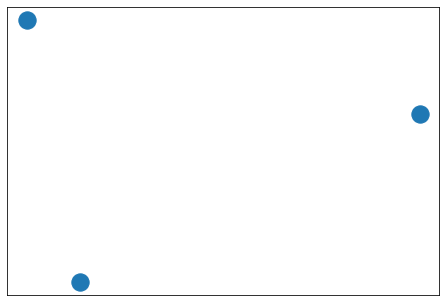

In [5]:
nx.draw(model, with_labels=True)
plt.savefig('model.png')
plt.close()